# <font color=green size=10>CURSO DE ESTATÍSTICA - PARTE 4</font>
***

## Trabalho sobre correlação e regressão

Utilizando os conhecimentos adquiridos em nosso treinamento realize a análise de regressão proposta abaixo.

Siga o roteiro proposto e vá completando as células vazias.

# <font color=green>DATASET DO PROJETO</font>
***

### Fonte: https://www.kaggle.com/dongeorge/beer-consumption-sao-paulo

### Descrição:
A cerveja é uma das bebidas mais democráticas e consumidas no mundo. Não sem razão, é perfeito para quase todas as situações, desde o happy hour até grandes festas de casamento.

Os dados (amostra) foram coletados em São Paulo - Brasil, em uma área universitária, onde existem algumas festas com grupos de alunos de 18 a 28 anos de idade (média).

### Dados:
- **temp_media** - Temperatura Média (°C)
- **consumo** - Consumo de Cerveja (litros)


---

### Solução do problema com dependência do statsmodels

In [1]:
#!pip install statsmodels --upgrade

### Utilize a célula abaixo para importar as biblioteca que precisar para executar as tarefas
#### <font color='red'>Sugestões: pandas, numpy, scipy, statsmodels</font>

In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import t as t_student
from scipy.stats import f, probplot
from scipy.special import factorial
import statsmodels.api as sm

### Importe o dataset

In [3]:
dataset = pd.read_csv('dados_projeto.csv', sep=';')

### Visualize o conteúdo do DataFrame

In [4]:
dataset.head()

,Y,X
0,25461,27.30
1,28972,27.02
2,30814,24.82
3,29799,23.98
4,28900,23.82


### Obtenha e avalie as estatísticas descritivas dos dados

In [5]:
dataset.describe()

,Y,X
count,365.000000,365.000000
mean,25401.367123,21.226356
std,4399.142703,3.180108
min,14343.000000,12.900000
25%,22008.000000,19.020000
50%,24867.000000,21.380000
75%,28631.000000,23.280000
max,37937.000000,28.860000


### Análise gráfica
### Construa um box plot para cada variável do dataset

C:\Users\thiag\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


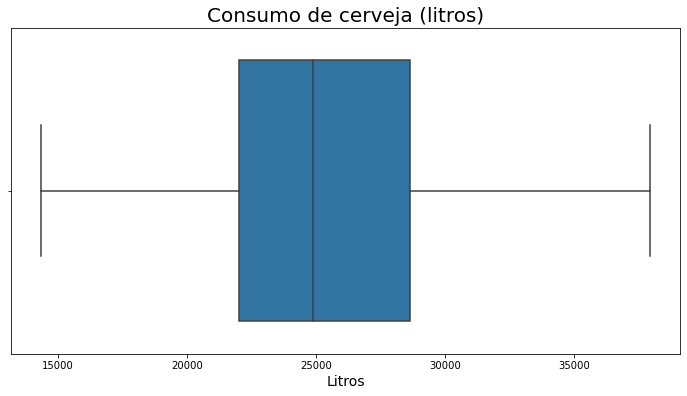

In [6]:
ax = sns.boxplot(dataset.Y)
ax.figure.set_size_inches(12, 6)
ax.set_title('Consumo de cerveja (litros)', fontsize = 20)
ax.set_xlabel('Litros', fontsize = 14)
ax

C:\Users\thiag\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


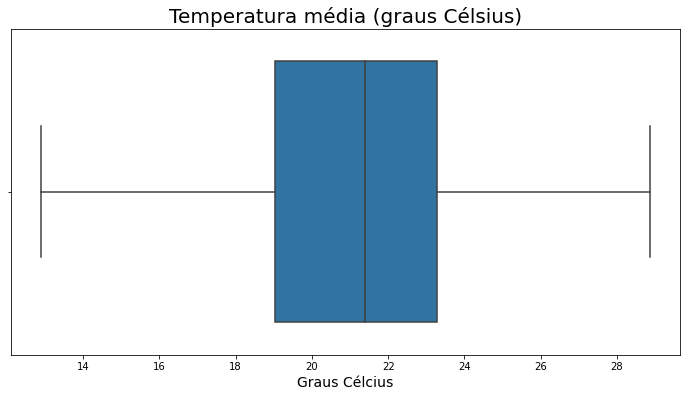

In [7]:
ax = sns.boxplot(dataset.X)
ax.figure.set_size_inches(12, 6)
ax.set_title('Temperatura média (graus Célsius)', fontsize = 20)
ax.set_xlabel('Graus Célcius', fontsize = 14)
ax

### Identifique se existe uma relação linear entre as variáveis $Y$ e $X$
### <font color='red'>Utilizando o método gráfico</font>

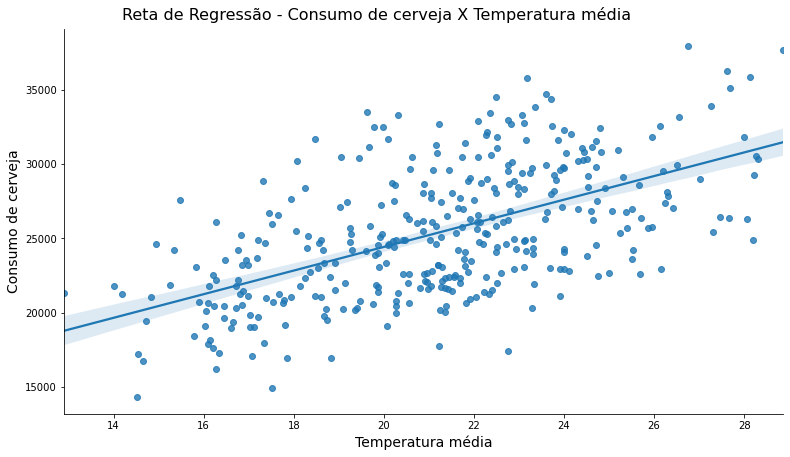

In [8]:
ax = sns.lmplot(x="X", y="Y", data=dataset)
ax.fig.set_size_inches(12, 6)
ax.fig.suptitle('Reta de Regressão - Consumo de cerveja X Temperatura média', fontsize=16, y=1.02)
ax.set_xlabels("Temperatura média", fontsize=14)
ax.set_ylabels("Consumo de cerveja", fontsize=14)
ax

### <font color='red'>Utilizando a matriz de correlação</font>

In [9]:
dataset.corr()

,Y,X
Y,1.000000,0.574615
X,0.574615,1.000000


### Avalie os resultados acima:

É possível afirmar que existe uma relação linear entre as variáveis?

Resp.: Sim.

É possível quantificar a intensidade dessa relação?

Resp.: Sim, 0.574615.

É possível afirmar que existe uma relação de causalidade entre $Y$ e $X$ a partir dos resultados da matriz de correlação?

Resp.: Não.

### Prepare os dados para estimar um modelo de regressão linear simples

In [10]:
X = sm.add_constant(dataset.X)
Y = dataset.Y

### Estime o modelo de regressão linear simples

In [11]:
regressao = sm.OLS(Y, X).fit()

### Visualize o resultado da regressão

In [12]:
print(regressao.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.330
Model:                            OLS   Adj. R-squared:                  0.328
Method:                 Least Squares   F-statistic:                     178.9
Date:                Fri, 25 Mar 2022   Prob (F-statistic):           1.87e-33
Time:                        20:19:22   Log-Likelihood:                -3506.3
No. Observations:                 365   AIC:                             7017.
Df Residuals:                     363   BIC:                             7024.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8528.9073   1275.363      6.687      0.0

### Obtenha o $Y$ previsto

In [13]:
Y_previsto = regressao.predict()
dataset['Y_previsto'] = Y_previsto


### Utilizando nosso modelo estimado para fazer previsões.
### Qual seria o consumo de cerveja para um dia com temperatura média de 42° C?

In [27]:
consumo_42 = regressao.predict([1, 42])[0]
print(f'O consumo de cerveja estimado quando a temperatura média for 42°C é de {consumo_42.round(2)} litros.')

O consumo de cerveja estimado quando a temperatura média for 42°C é de 41913.97 litros.


### Obtenha os resíduos da regressão

In [15]:
dataset['Residuos'] = regressao.resid
dataset.head()

,Y,X,Y_previsto,Residuos
0,25461,27.30,30229.200544,-4768.200544
1,28972,27.02,30006.633434,-1034.633434
2,30814,24.82,28257.891852,2556.108148
3,29799,23.98,27590.190521,2208.809479
4,28900,23.82,27463.009315,1436.990685


### Plote um gráfico de dispersão dos resíduos da regressão contra o $Y$ previsto

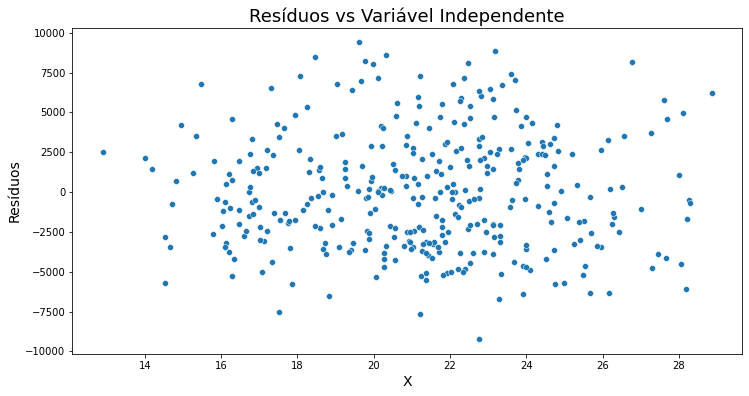

In [16]:
ax = sns.scatterplot(x=dataset.X, y=dataset.Residuos)
ax.figure.set_size_inches(12, 6)
ax.set_title('Resíduos vs Variável Independente', fontsize=18)
ax.set_xlabel('X', fontsize=14)
ax.set_ylabel('Resíduos', fontsize=14)
ax

### Obtenha o QQPlot dos resíduos

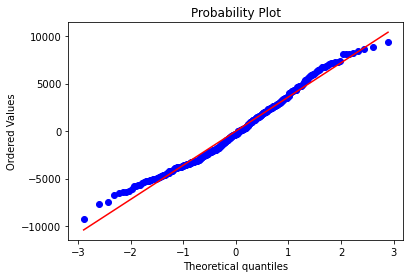

In [21]:
(_, (_, _, _)) = probplot(dataset.Residuos, plot = plt)

### <font color='red'>A partir dos outputs acima, qual conclusão podemos tirar sobre o comportamento dos resíduos?</font>

### Obtenha o R² da regressão pelo método da soma dos quadrados

# $$R^2 = \frac{SQR}{SQT}$$

In [22]:
SQR = dataset.Y_previsto.apply(lambda y: (y - dataset.Y.mean()) ** 2).sum()
SQR

2325899486.7377872

In [23]:
SQT = dataset.Y.apply(lambda y: (y - dataset.Y.mean()) ** 2).sum()
SQT

7044294174.805479

In [25]:
R_2 = SQR / SQT
R_2

0.33018204933243217

In [26]:
regressao.rsquared

0.330182049332432